# ANZ Virtual Internship
## Task2: Predictive Analytics

#### Loading the Transaction Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ANZ synthesised transaction dataset.xlsx to ANZ synthesised transaction dataset.xlsx


In [ ]:
import io
import pandas as pd
import numpy as np
dataframe = pd.read_excel(io.BytesIO(uploaded['ANZ synthesised transaction dataset.xlsx']))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
dataframe.head(3)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit


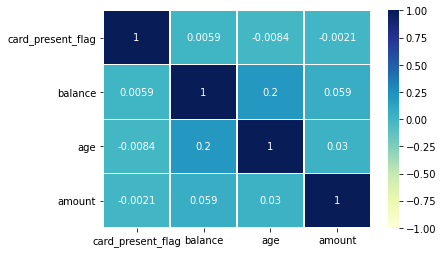

In [ ]:
# Building heatmap
import seaborn as sns
corrmat=dataframe[['card_present_flag','balance','age','amount']].corr()
sns.heatmap(corrmat ,vmin=-1,annot=True,cmap='YlGnBu',linewidths=0.1)

### Extracting Target variable

In [ ]:
salary = dataframe[dataframe['txn_description']=='PAY/SALARY'].groupby('customer_id').mean()
salary.head()

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73


In [ ]:
salaries = []

for customer_id in dataframe['customer_id']:
    salaries.append(int(salary.loc[customer_id]['amount'].mean()))
dataframe['annual_salary'] = salaries

In [ ]:
df_salary=dataframe[dataframe['txn_description']=='PAY/SALARY']
df_salary.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,annual_salary
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,8342.11,2018-08-01,M,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit,3903
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,2040.58,2018-08-01,F,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit,1626
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,3158.51,2018-08-01,M,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit,983
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,2517.66,2018-08-01,M,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit,1408
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,2271.79,2018-08-01,F,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit,1068


In [ ]:
print(salary.shape)
print(dataframe.shape)
print(df_salary.shape)

(100, 5)
(12043, 24)
(883, 24)


### Correlation of other features with Salary

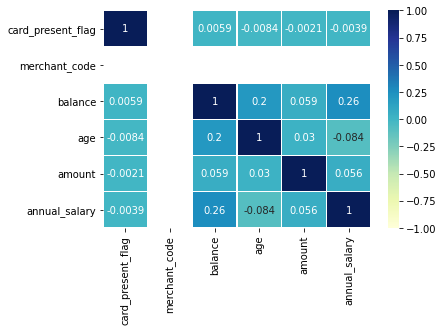

In [ ]:
cor=dataframe.corr()
sns.heatmap(cor ,vmin=-1,annot=True,cmap='YlGnBu',linewidths=0.1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


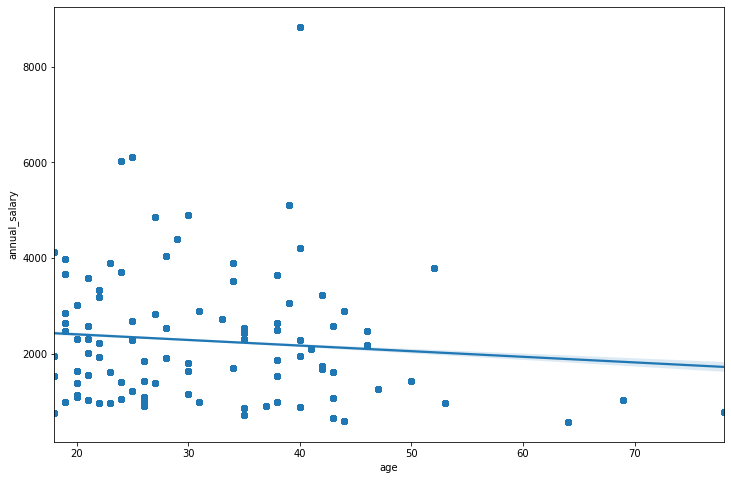

In [ ]:
#Salary v/s Age

plt.figure(figsize=(12, 8))
sns.regplot("age", "annual_salary", data=dataframe)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


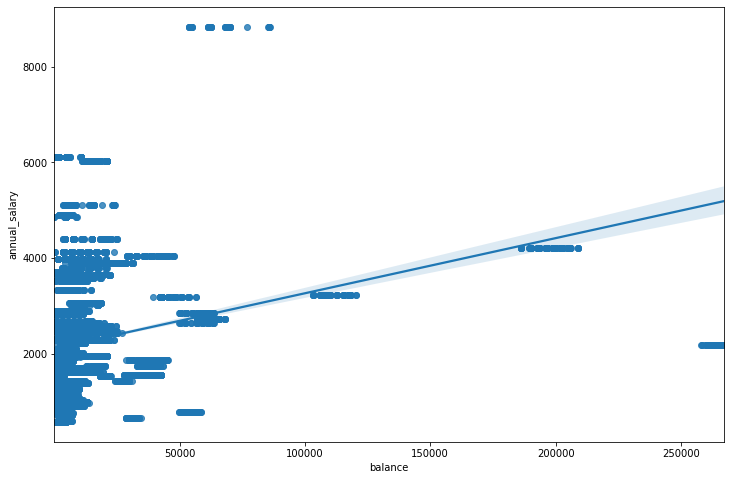

In [ ]:
#Salary v/s Account Balance

plt.figure(figsize=(12, 8))
sns.regplot("balance", "annual_salary",fit_reg=True ,data=dataframe)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


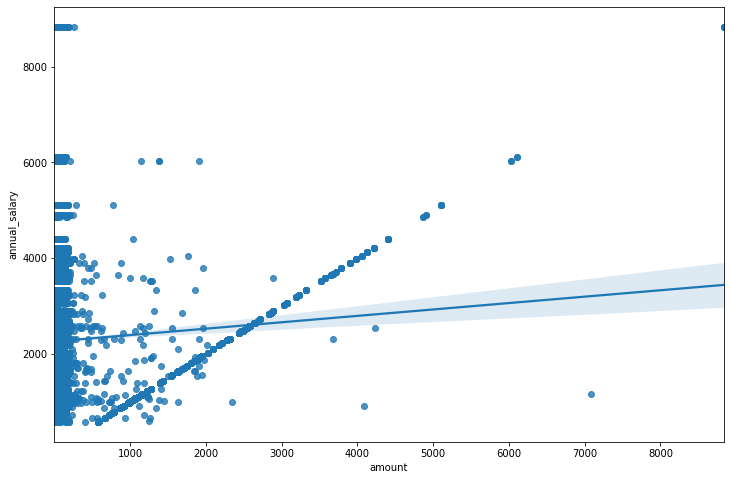

In [ ]:
plt.figure(figsize=(12, 8))
sns.regplot("amount", "annual_salary", fit_reg=True, data=dataframe)

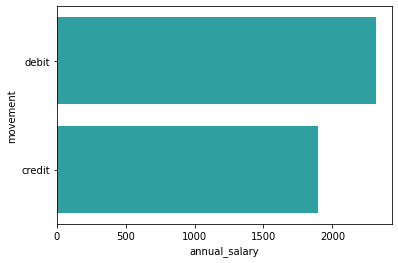

In [ ]:
sns.barplot(y="movement", x="annual_salary", ci=False, orient = 'h', data=dataframe, color="#1CB3B1")

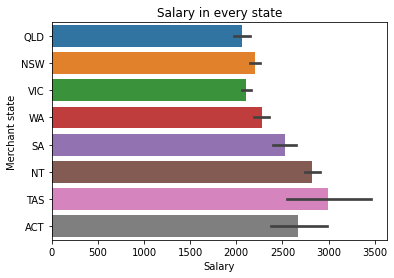

In [ ]:
sns.barplot(x=dataframe.annual_salary,y=dataframe.merchant_state)
plt.title("Salary in every state")
plt.xlabel("Salary")
plt.ylabel("Merchant state")
plt.show()

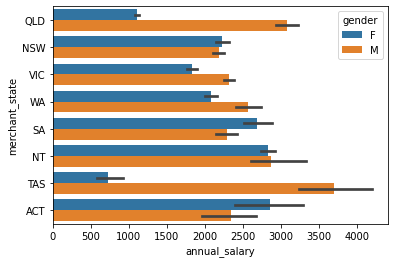

In [ ]:
sns.barplot(y=dataframe.merchant_state,x=dataframe.annual_salary,hue=dataframe.gender)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


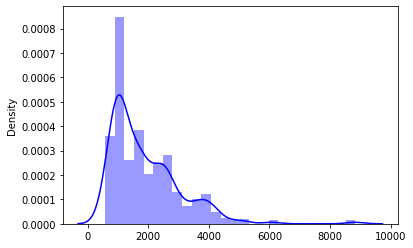

In [ ]:
sns.distplot(x=df_salary.annual_salary,color='blue')

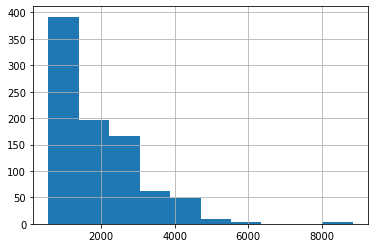

In [ ]:
df_salary['annual_salary'].hist()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


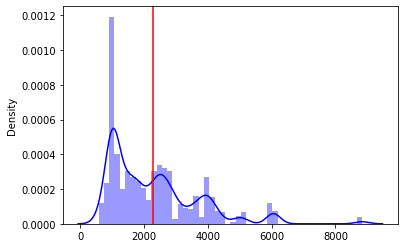

In [ ]:
x = dataframe['annual_salary'].values

sns.distplot(x, color = 'blue');

# Calculating the mean
mean = dataframe['annual_salary'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')

### Correlation of POS, Payment, Interbank and Phonebank with Salary

In [ ]:
#Mean POS (Point of Sale) for each customer
# POS indicates spending behavior of customer
pos=dataframe[dataframe["txn_description"]==("POS"or"SALES-POS")].groupby("customer_id").mean().reset_index()
pos=pos[["customer_id","amount"]]
pos=pos.rename(columns = {'amount':'pos'})

In [ ]:
pos.head()

,customer_id,pos
0,CUS-1005756958,28.769615
1,CUS-1117979751,23.321923
2,CUS-1140341822,34.781282
3,CUS-1147642491,54.271316
4,CUS-1196156254,31.157432


In [ ]:
#Mean payment made by the customer
payment=dataframe[dataframe["txn_description"]=="PAYMENT"].groupby("customer_id").mean().reset_index()
payment=payment[["customer_id","amount"]]
payment=payment.rename(columns = {'amount':'payment'})

In [ ]:
payment.head()

,customer_id,payment
0,CUS-1005756958,144.000000
1,CUS-1117979751,98.925000
2,CUS-1140341822,142.000000
3,CUS-1147642491,96.185185
4,CUS-1196156254,43.100000


In [ ]:
#Mean Inter-bank transfer by each custome
interbank=dataframe[dataframe["txn_description"]=='INTER BANK'].groupby("customer_id").mean().reset_index()
interbank=interbank[["customer_id","amount"]]
interbank=interbank.rename(columns = {'amount':'interbank'})
interbank.head()

,customer_id,interbank
0,CUS-1117979751,1001.0000
1,CUS-1140341822,90.0000
2,CUS-1147642491,125.0000
3,CUS-1196156254,153.4000
4,CUS-1271030853,76.1875


In [ ]:
#Mean phone transaction made by the customer

#Banking via phone/online pay

phonebank=dataframe[dataframe["txn_description"]=='PHONE BANK'].groupby("customer_id").mean().reset_index()
phonebank=phonebank[["customer_id","amount"]]
phonebank=phonebank.rename(columns = {'amount':'phonebank'})
phonebank.head()

,customer_id,phonebank
0,CUS-1005756958,182.0
1,CUS-1646183815,150.0
2,CUS-1896554896,1916.0
3,CUS-2155701614,82.0
4,CUS-2348881191,1629.0


In [ ]:
#Merging relevant dataframes
customer=dataframe[["customer_id","age","balance","movement","annual_salary"]]
customer.head()

,customer_id,age,balance,movement,annual_salary
0,CUS-2487424745,26,35.39,debit,1013
1,CUS-2487424745,26,21.20,debit,1013
2,CUS-2142601169,38,5.71,debit,1002
3,CUS-1614226872,40,2117.22,debit,892
4,CUS-2487424745,26,17.95,debit,1013


In [ ]:
df=pd.merge(customer, payment, on="customer_id")
df=pd.merge(df, pos, on="customer_id")
df=pd.merge(df, interbank, on="customer_id")
df = pd.merge(df,phonebank,on='customer_id')
df.shape

(1140, 9)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


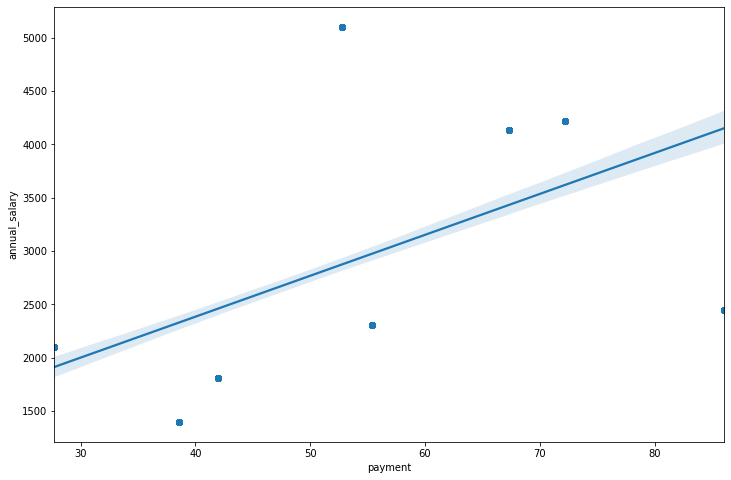

In [ ]:
#Payment v/s Salary

plt.figure(figsize=(12, 8))
sns.regplot("payment", "annual_salary", fit_reg=True, data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


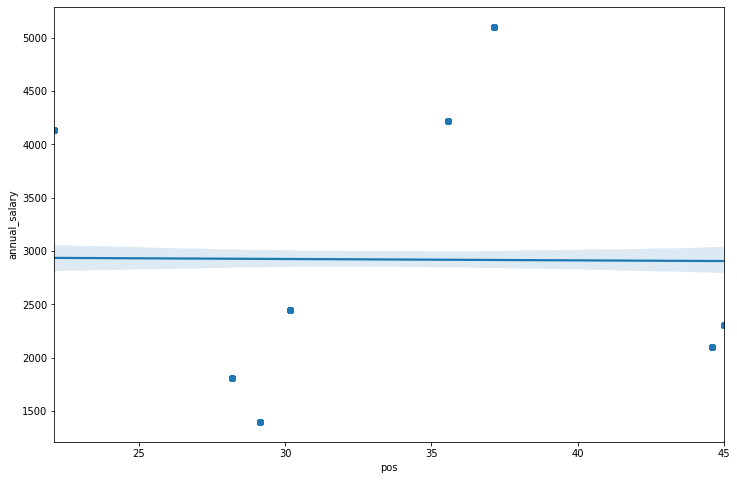

In [ ]:
#Salary vs Point Of Sale

plt.figure(figsize=(12, 8))
sns.regplot("pos", "annual_salary", fit_reg=True, data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


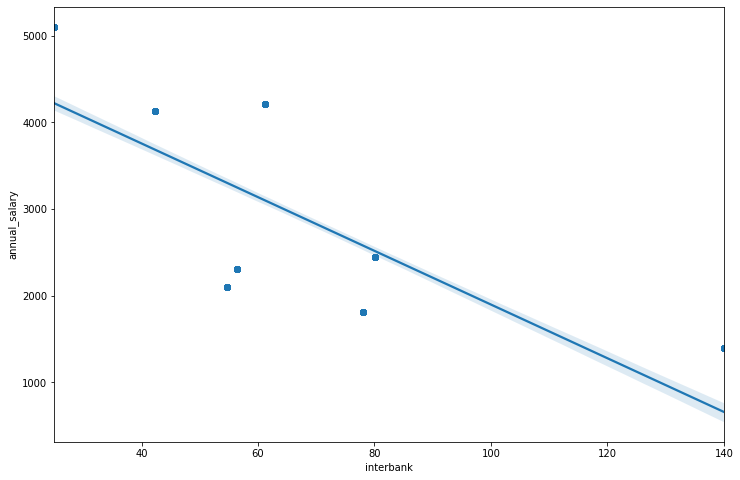

In [ ]:
#Salary vs Interbank

plt.figure(figsize=(12, 8))
sns.regplot("interbank", "annual_salary", fit_reg=True, data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


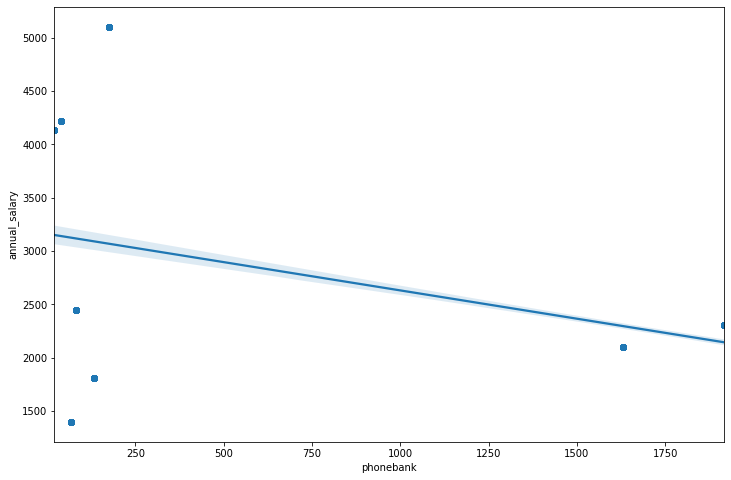

In [ ]:
#Salary vs Phonebank

plt.figure(figsize=(12, 8))
sns.regplot("phonebank", "annual_salary", fit_reg=True, data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


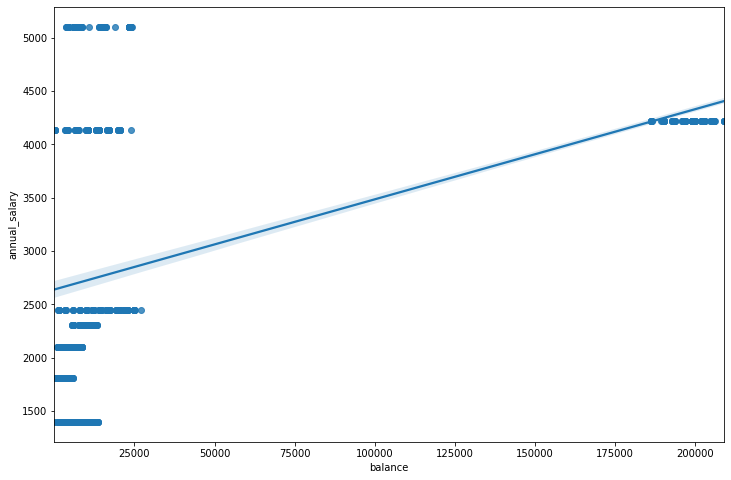

In [ ]:
#Salary vs Point Of Sale

plt.figure(figsize=(12, 8))
sns.regplot("balance", "annual_salary", fit_reg=True, data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


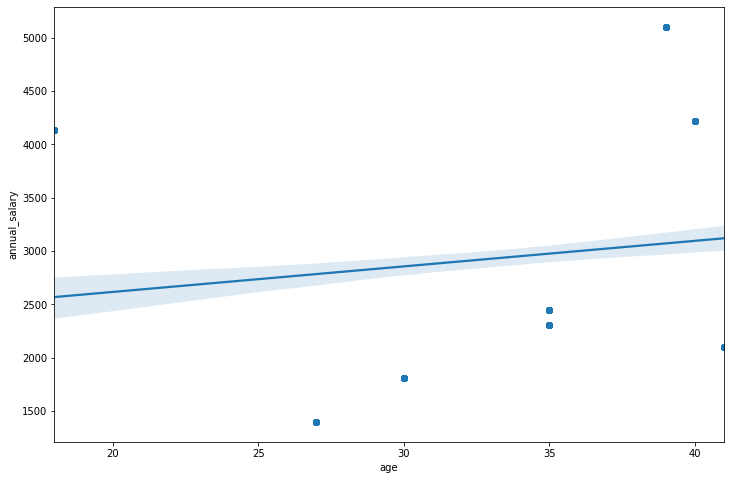

In [ ]:
#Salary vs age

plt.figure(figsize=(12, 8))
sns.regplot("age", "annual_salary", fit_reg=True, data=df)

### Data preparation

In [ ]:
 pd.DataFrame(list(zip(dataframe.columns,dataframe.isna().sum()/12043*100, dataframe.isna().sum())))

,0,1,2
0,status,0.000000,0
1,card_present_flag,35.921282,4326
2,bpay_biller_code,92.651333,11158
3,account,0.000000,0
4,currency,0.000000,0
5,long_lat,0.000000,0
6,txn_description,0.000000,0
7,merchant_id,35.921282,4326
8,merchant_code,92.667940,11160
9,first_name,0.000000,0


#### Columns bpay_biller_code & merchant_code have 92% data missing so we choose not to add these variables in Model building.

In [ ]:
dataframe.drop(['bpay_biller_code','merchant_code'],axis=1,inplace=True)
dataframe.isnull().sum()

status                  0
card_present_flag    4326
account                 0
currency                0
long_lat                0
txn_description         0
merchant_id          4326
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
country                 0
customer_id             0
merchant_long_lat    4326
movement                0
annual_salary           0
dtype: int64

### Feature selection

In [ ]:
dataframe.columns

Index(['status', 'card_present_flag', 'account', 'currency', 'long_lat',
       'txn_description', 'merchant_id', 'first_name', 'balance', 'date',
       'gender', 'age', 'merchant_suburb', 'merchant_state', 'extraction',
       'amount', 'transaction_id', 'country', 'customer_id',
       'merchant_long_lat', 'movement', 'annual_salary'],
      dtype='object')

In [ ]:
df_new = dataframe[['balance','gender','age','merchant_state','amount','movement','annual_salary']]
df_new.head()

,balance,gender,age,merchant_state,amount,movement,annual_salary
0,35.39,F,26,QLD,16.25,debit,1013
1,21.20,F,26,NSW,14.19,debit,1013
2,5.71,M,38,NSW,6.42,debit,1002
3,2117.22,F,40,QLD,40.90,debit,892
4,17.95,F,26,QLD,3.25,debit,1013


In [ ]:
df_dummy=pd.get_dummies(df_new,columns=['gender','merchant_state','movement'])
df_dummy

,balance,age,amount,annual_salary,gender_F,gender_M,merchant_state_ACT,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit
0,35.39,26,16.25,1013,1,0,0,0,0,1,0,0,0,0,0,1
1,21.20,26,14.19,1013,1,0,0,1,0,0,0,0,0,0,0,1
2,5.71,38,6.42,1002,0,1,0,1,0,0,0,0,0,0,0,1
3,2117.22,40,40.90,892,1,0,0,0,0,1,0,0,0,0,0,1
4,17.95,26,3.25,1013,1,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,14054.14,30,9.79,1636,1,0,0,0,0,0,0,0,1,0,0,1
12039,9137.79,20,63.87,2320,0,1,0,1,0,0,0,0,0,0,0,1
12040,45394.57,28,43.96,4054,0,1,0,1,0,0,0,0,0,0,0,1
12041,11350.67,69,30.77,1043,0,1,0,0,0,0,0,0,1,0,0,1


In [ ]:
df_dummy.columns

Index(['balance', 'age', 'amount', 'annual_salary', 'gender_F', 'gender_M',
       'merchant_state_ACT', 'merchant_state_NSW', 'merchant_state_NT',
       'merchant_state_QLD', 'merchant_state_SA', 'merchant_state_TAS',
       'merchant_state_VIC', 'merchant_state_WA', 'movement_credit',
       'movement_debit'],
      dtype='object')

In [ ]:
df_dummy.drop(['gender_M','merchant_state_ACT','movement_credit'],axis=1,inplace=True)
df_dummy.head()

,balance,age,amount,annual_salary,gender_F,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_debit
0,35.39,26,16.25,1013,1,0,0,1,0,0,0,0,1
1,21.20,26,14.19,1013,1,1,0,0,0,0,0,0,1
2,5.71,38,6.42,1002,0,1,0,0,0,0,0,0,1
3,2117.22,40,40.90,892,1,0,0,1,0,0,0,0,1
4,17.95,26,3.25,1013,1,0,0,1,0,0,0,0,1


In [ ]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   balance             12043 non-null  float64
 1   age                 12043 non-null  int64  
 2   amount              12043 non-null  float64
 3   annual_salary       12043 non-null  int64  
 4   gender_F            12043 non-null  uint8  
 5   merchant_state_NSW  12043 non-null  uint8  
 6   merchant_state_NT   12043 non-null  uint8  
 7   merchant_state_QLD  12043 non-null  uint8  
 8   merchant_state_SA   12043 non-null  uint8  
 9   merchant_state_TAS  12043 non-null  uint8  
 10  merchant_state_VIC  12043 non-null  uint8  
 11  merchant_state_WA   12043 non-null  uint8  
 12  movement_debit      12043 non-null  uint8  
dtypes: float64(2), int64(2), uint8(9)
memory usage: 482.3 KB


## Modelling

In [ ]:
X=df_dummy.iloc[:,df_dummy.columns!='annual_salary']
Y=df_dummy['annual_salary']

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2,random_state=0)
print("shape of X_train,Y_train:",X_train.shape,y_train.shape)
print("shape of X_test,Y_test:",X_test.shape,y_test.shape)

shape of X_train,Y_train: (9634, 12) (9634,)
shape of X_test,Y_test: (2409, 12) (2409,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(max_depth=110,random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=110,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_pred2 = regressor.predict(X_test)
from sklearn.metrics import r2_score
print("Residual sum of squares: %.2f"
      % np.mean((y_pred2 - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred2 , y_test) )
  

Residual sum of squares: 236419.44
R2-score: 0.88


In [ ]:
y_hat3 = regressor.predict(X_train)
from sklearn.metrics import r2_score
print("Residual sum of squares: %.2f"
      % np.mean((y_hat3 - y_train) ** 2))
print("R2-score: %.2f" % r2_score(y_hat3 , y_train) )

Residual sum of squares: 0.00
R2-score: 1.00


### Evaluation

In [ ]:
# Importing the libraries
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

# r2 score evalutation on decision tree
r2_dec = r2_score(y_test , y_pred2)
print(r2_dec)
# Mean absoulte error on decision tree

mae_dec = mean_absolute_error(y_test , y_pred2)
print(mae_dec)

# Mean Squared Error on decision tree 

mse_dec = mean_squared_error(y_test , y_pred2)
print(mse_dec)

0.8832337632352842
128.96388542963885
236419.4396014944


### Visualization of evaluation metrics


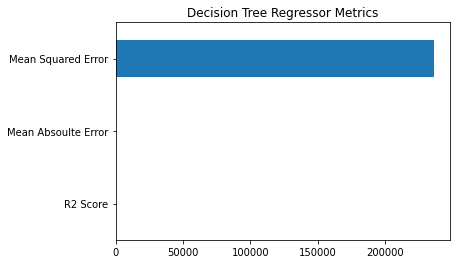

In [ ]:
# Visualize decision tree regressor metrics

decision_tree_metrics = pd.DataFrame({'R2 Score':r2_dec,
                           'Mean Absoulte Error':mae_dec,
                           'Mean Squared Error':mse_dec },
                         index=[0])

decision_tree_metrics.T.plot.barh(title = 'Decision Tree Regressor Metrics', 
                     legend= False)

In [ ]:

dec_importance = regressor.feature_importances_
dec_importance

array([0.40908255, 0.38904352, 0.04941932, 0.07414049, 0.00518231,
       0.0064449 , 0.03643378, 0.00432794, 0.00317363, 0.00711726,
       0.01054113, 0.00509317])

In [ ]:
col_list =[]
for column in df_dummy.iloc[:,df_dummy.columns!='annual_salary'].columns:
     col_list.append(column)
print(col_list)

['balance', 'age', 'amount', 'gender_F', 'merchant_state_NSW', 'merchant_state_NT', 'merchant_state_QLD', 'merchant_state_SA', 'merchant_state_TAS', 'merchant_state_VIC', 'merchant_state_WA', 'movement_debit']


[Text(0, 0.5, 'Columns'),
 Text(0.5, 0, 'impotance'),
 Text(0.5, 1.0, 'Feature Importance for Decision Tree')]

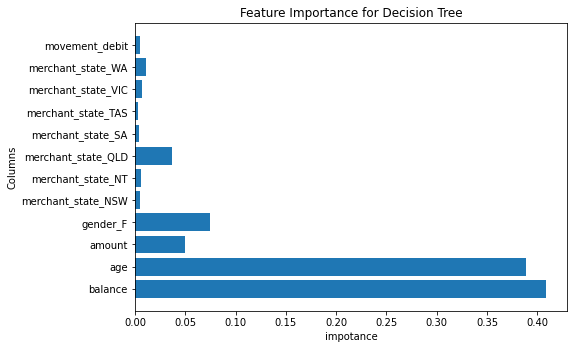

In [ ]:
# Visualizing the feature importance for decision tree
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(col_list , dec_importance)
ax.set(title='Feature Importance for Decision Tree' ,
      xlabel = 'impotance' , ylabel='Columns')

### Removing varibales 

In [ ]:
df_dummy.columns

Index(['balance', 'age', 'amount', 'annual_salary', 'gender_F',
       'merchant_state_NSW', 'merchant_state_NT', 'merchant_state_QLD',
       'merchant_state_SA', 'merchant_state_TAS', 'merchant_state_VIC',
       'merchant_state_WA', 'movement_debit'],
      dtype='object')

In [ ]:
x1=df_dummy[['balance', 'age', 'amount', 'gender_F', 'merchant_state_QLD','movement_debit']]
y1=df_dummy['annual_salary']
from sklearn.preprocessing import StandardScaler
x1 = StandardScaler().fit_transform(x1)
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te= train_test_split(x1, y1, test_size=0.2,random_state=0)
print("shape of X_train,Y_train:",X_tr.shape,y_tr.shape)
print("shape of X_test,Y_test:",X_te.shape,y_te.shape)

shape of X_train,Y_train: (9634, 6) (9634,)
shape of X_test,Y_test: (2409, 6) (2409,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor2 = DecisionTreeRegressor(max_depth=16,random_state = 0)  
  
# fit the regressor with X and Y data 
regressor2.fit(X_tr, y_tr) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=16,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_pred = regressor2.predict(X_te)


In [ ]:
# Importing the libraries
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

# r2 score evalutation on decision tree
r2_dec2 = r2_score(y_te , y_pred)
print(r2_dec2)
# Mean absoulte error on decision tree

mae_dec2 = mean_absolute_error(y_te , y_pred)
print(mae_dec2)

# Mean Squared Error on decision tree 

mse_dec2 = mean_squared_error(y_te , y_pred)
print(mse_dec2)

0.8800284417948139
165.56169127840622
242909.33188281895


### Important Feature

In [ ]:
importance = regressor2.feature_importances_
col =[]
for column in df_dummy[['balance', 'age', 'amount', 'gender_F', 'merchant_state_QLD', 'movement_debit']].columns:
     col.append(column)
print(col)

['balance', 'age', 'amount', 'gender_F', 'merchant_state_QLD', 'movement_debit']


[Text(0, 0.5, 'Columns'),
 Text(0.5, 0, 'impotance'),
 Text(0.5, 1.0, 'Feature Importance for Decision Tree')]

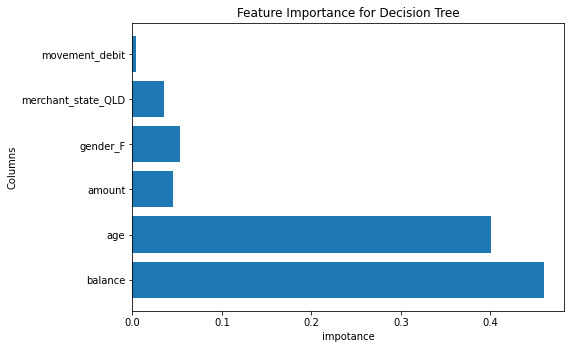

In [ ]:
# Visualizing the feature importance for decision tree
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(col , importance)
ax.set(title='Feature Importance for Decision Tree' ,
      xlabel = 'impotance' , ylabel='Columns')

### Parameter Tuning

In [ ]:
regressor.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 110,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
#grid for Decision tree
param_grid = {
              "min_samples_split": [2,3,4,5],
              "max_depth": [15,16,17,18,19],
              "min_samples_leaf": [1,2,3,4,5,6,7,8],
              
              }

In [ ]:
# Tune Decision Tree Regressor
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV

grid_cv = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)

grid_cv.fit(X_train,y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                        

In [ ]:
print("R-Squared::{}".format(grid_cv.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv.best_params_))

R-Squared::0.8545433090342526
Best Hyperparameters::
{'max_depth': 19, 'min_samples_leaf': 4, 'min_samples_split': 3}


### Final report

In [ ]:
Report = pd.DataFrame({'Model':['Decision Tree'],'R-Score':[r2_dec],'Mean absolute error':[mae_dec],'Mean Sqared error':[mse_dec]})
Report

,Model,R-Score,Mean absolute error,Mean Sqared error
0,Decision Tree,0.883234,128.963885,236419.439601
